![](DIO_logo.png)

<div align="center"> <h3>Análise de Dados com Pandas</h3></div>

### 1. Importando as bibliotecas necessárias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
plt.style.use('ggplot')

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

### 2. carregando os dados (planilhas do Excel)

In [3]:
df = pd.read_excel("datasets/ds3/AdventureWorks.xlsx")

In [4]:
df

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899,2008-03-22,2008-04-04,306,1226,19049,200803224CS555,330.99,999.00,6,419.58,"5,574.42",Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black
900,2008-10-04,2008-10-15,306,1155,19057,200810044CS636,324.69,980.00,6,"1,176.00","4,704.00",Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black
901,2008-12-11,2008-12-15,306,1155,19060,200812114CS676,324.69,980.00,6,"1,176.00","4,704.00",Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black
902,2008-12-17,2008-12-21,306,1226,19060,200812174CS676,330.99,999.00,6,"1,198.80","4,795.20",Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black


In [5]:
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

### Convertendo os dados das colunas "ID Loja" e "ID Produto" para dados categóricos

In [6]:
df[['ID Loja', 'ID Produto']] = df[['ID Loja', 'ID Produto']].astype('category')

In [7]:
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                 category
ID Produto              category
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

### Adicionando uma coluna ao dataframe

In [9]:
df['Prazo_envio'] = (df['Data Envio'] - df['Data Venda']).dt.days

In [10]:
df['Lucro'] = df['Valor Venda'] - (df['Custo Unitário'] * df['Quantidade'])

In [11]:
df['Custo'] = df['Custo Unitário'] * df['Quantidade']

###  3. Explorando o conjunto de dados

#### número de lojas, produtos, clientes e fabricantes (únicos).

In [12]:
df[['ID Loja', 'ID Produto', 'ID Cliente', 'Fabricante']].nunique()

ID Loja         3
ID Produto      9
ID Cliente    168
Fabricante      3
dtype: int64

#### Explorando os dados agrupados por Loja

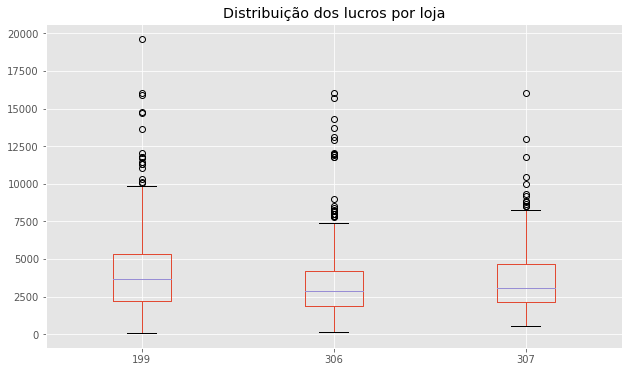

In [13]:
df[['Lucro', 'ID Loja']].boxplot(by = 'ID Loja', figsize = (10, 6));
plt.suptitle('');
plt.title('Distribuição dos lucros por loja')
plt.xlabel('');

In [14]:
loja_lucro_total = df.groupby('ID Loja')['Lucro'].sum()
for i, j in enumerate(loja_lucro_total):
    print(f'O lucro total da loja {loja_lucro_total.index[i]} foi de  {j:,.2f}')

O lucro total da loja 199 foi de  1,294,718.51
O lucro total da loja 306 foi de  1,016,493.12
O lucro total da loja 307 foi de  1,186,611.46


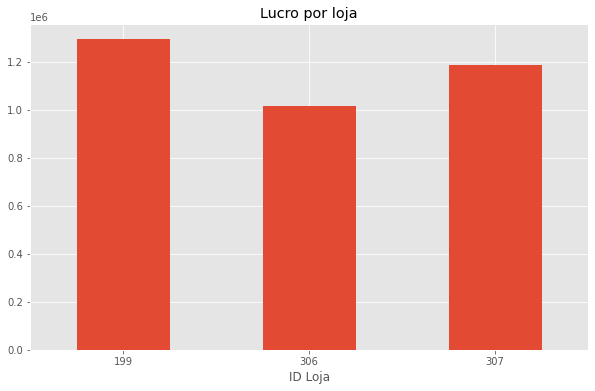

In [15]:
loja_lucro_total.plot.bar(figsize = (10, 6));
plt.title('Lucro por loja')
plt.xticks(rotation = 'horizontal');

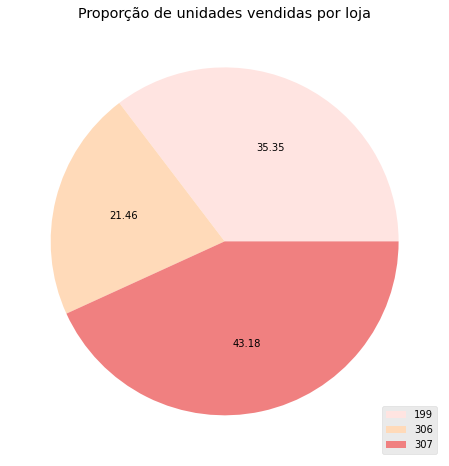

In [16]:
(df.groupby('ID Loja')['Quantidade']
 .sum().plot.pie(figsize = (8, 8),
               autopct = '%.2f',
               labeldistance = None,
              colors = ['mistyrose', 'peachpuff', 'lightcoral']));
plt.title("Proporção de unidades vendidas por loja");
plt.ylabel('');
plt.legend(loc = 4);

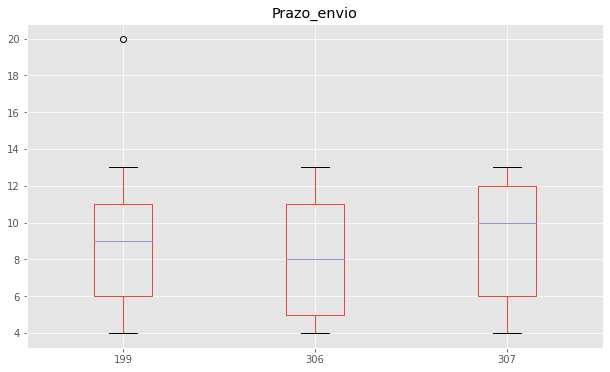

In [17]:
df[['Prazo_envio', 'ID Loja']].boxplot(by = 'ID Loja', figsize = (10, 6));
plt.suptitle('');
plt.xlabel('');

Text(0.5, 1.0, 'Distribuição dos prazos de envio')

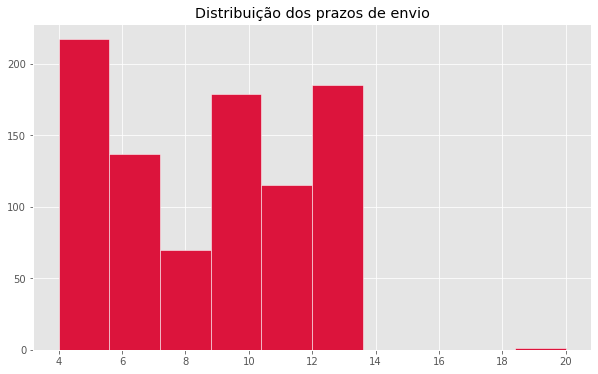

In [18]:
df['Prazo_envio'].hist(edgecolor = 'white',
                color = 'crimson', figsize = (10, 6));
plt.title("Distribuição dos prazos de envio")

#### Explorando os dados agrupados por produto

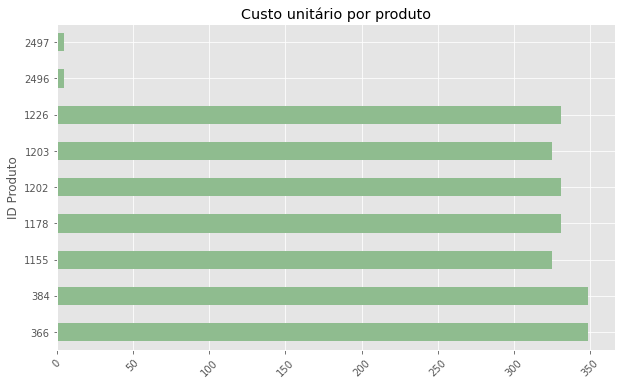

In [19]:
custo_unitario =  df.groupby('ID Produto')['Custo Unitário'].mean()
custo_unitario.plot.barh(figsize = (10, 6), color = 'darkseagreen');
plt.xticks(rotation = 45);
plt.title("Custo unitário por produto");

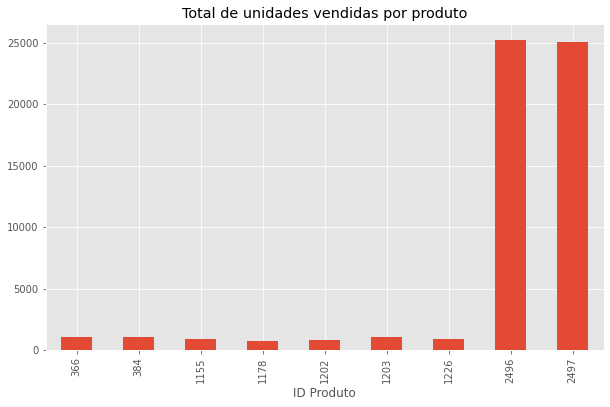

In [20]:
unidades_vendidas = df.groupby('ID Produto')['Quantidade'].sum()
unidades_vendidas.plot.bar(figsize = (10, 6));
plt.title('Total de unidades vendidas por produto');

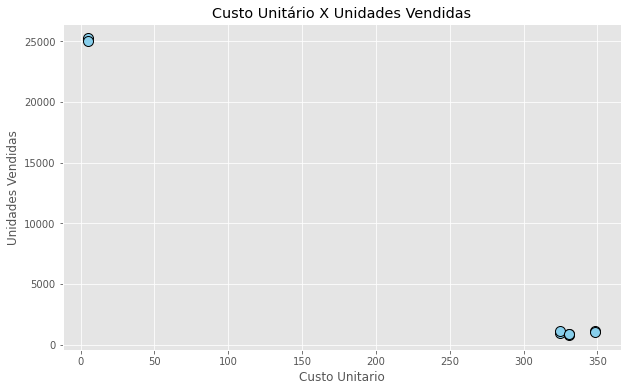

In [21]:
plt.figure(figsize = (10, 6));
plt.plot(custo_unitario, unidades_vendidas, 'o',
         color = 'skyblue',
         markersize = 10,
         markeredgecolor = 'black');
plt.xlabel('Custo Unitario');
plt.ylabel('Unidades Vendidas');
plt.title('Custo Unitário X Unidades Vendidas');

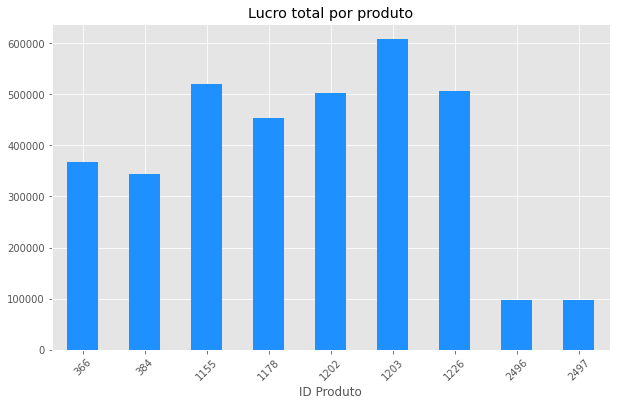

In [22]:
lucro_total = df.groupby('ID Produto')['Lucro'].sum()
lucro_total.plot.bar(figsize = (10, 6), color = 'dodgerblue');
plt.title('Lucro total por produto');
plt.xticks(rotation = 45);

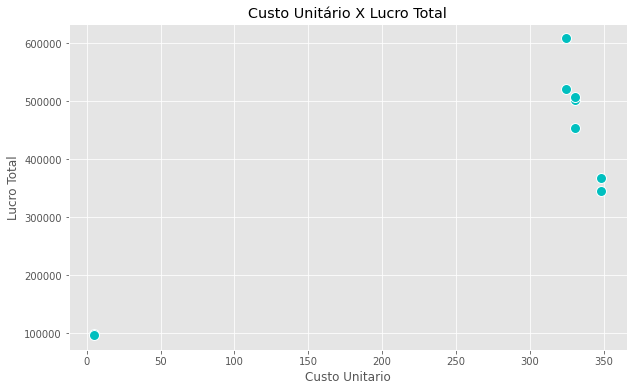

In [23]:
plt.figure(figsize = (10, 6))
plt.plot(custo_unitario,
        lucro_total,
        'oc', markersize = 10,
        markeredgecolor = 'white' );
plt.xlabel('Custo Unitario');
plt.ylabel('Lucro Total');
plt.title('Custo Unitário X Lucro Total');

#### Explorando os dados agurpados por fabricante

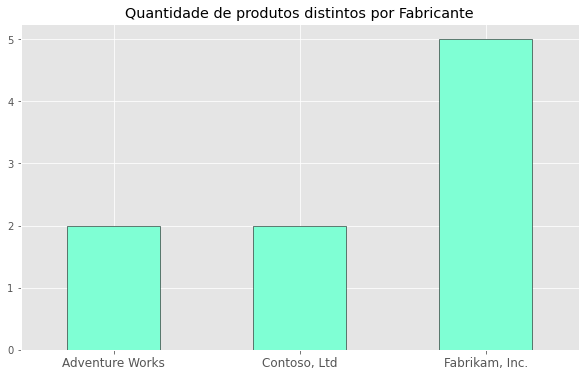

In [24]:
df.groupby('Fabricante')['ID Produto'].nunique().plot.bar(
        figsize = (10, 6), color = 'aquamarine',
        edgecolor = 'black');
plt.title('Quantidade de produtos distintos por Fabricante');
plt.xticks(rotation = 'horizontal', fontsize = 12);
plt.xlabel('');

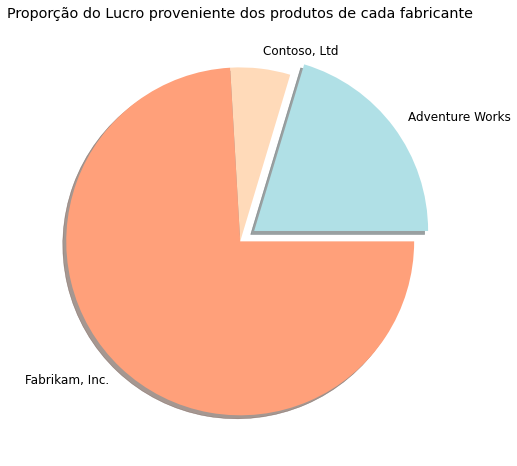

In [25]:
df.groupby('Fabricante')['Lucro'].sum().plot.pie(figsize = (8, 8),
                                                colors = ['powderblue', 'peachpuff', 'lightsalmon'],
                                                explode = (0.1, 0, 0),
                                                shadow = True,
                                                textprops={'fontsize': 12});
plt.ylabel('');
plt.title('Proporção do Lucro proveniente dos produtos de cada fabricante');

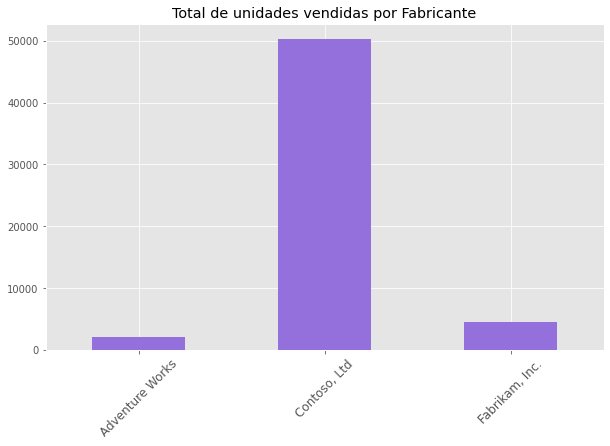

In [26]:
df.groupby('Fabricante')['Quantidade'].sum().plot.bar(
    figsize = (10, 6), color = 'mediumpurple');
plt.xticks(rotation = 45, fontsize = 12);
plt.title('Total de unidades vendidas por Fabricante')
plt.xlabel('');

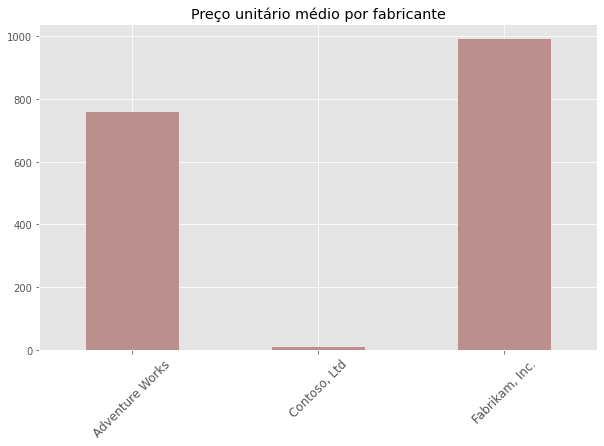

In [27]:
df.groupby('Fabricante')['Preço Unitário'].mean().plot.bar(
    figsize = (10, 6), color = 'rosybrown');
plt.xticks(rotation = 45, fontsize = 12);
plt.title('Preço unitário médio por fabricante');
plt.xlabel('');

In [28]:
venda_fabricante_mes = (df
                        .groupby(['Fabricante', df['Data Venda']
                        .dt.month])[['Valor Venda', 'Data Venda']]
                        .sum()
                        .reset_index())

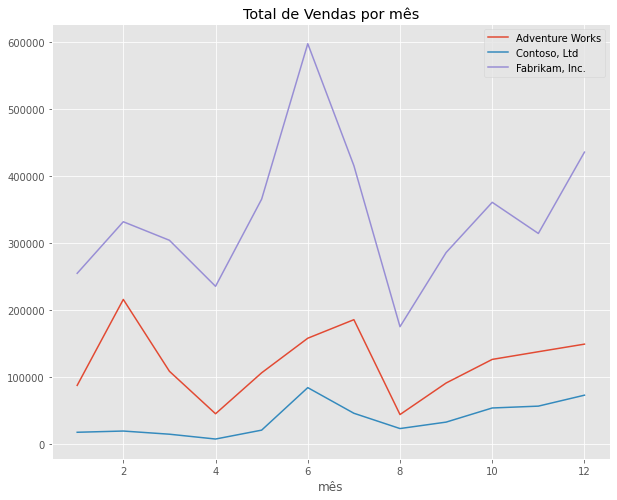

In [29]:
nome_fabricante = venda_fabricante_mes['Fabricante'].unique()
fig, ax = plt.subplots(figsize = (10, 8));

for nome in nome_fabricante:
    (venda_fabricante_mes
     .query("Fabricante == @nome")
     .plot('Data Venda', 'Valor Venda', label = nome, ax = ax));

plt.title("Total de Vendas por mês");
plt.xlabel('mês');

In [30]:
venda_fabricante_ano = (df
                        .groupby(['Fabricante', df['Data Venda']
                        .dt.year])[['Valor Venda', 'Data Venda']]
                        .sum()
                        .reset_index())
venda_fabricante_ano

,Fabricante,Data Venda,Valor Venda
0,Adventure Works,2008,"623,151.80"
1,Adventure Works,2009,"833,451.32"
2,"Contoso, Ltd",2008,"130,897.97"
3,"Contoso, Ltd",2009,"319,498.58"
4,"Fabrikam, Inc.",2008,"2,433,557.88"
5,"Fabrikam, Inc.",2009,"1,644,048.59"


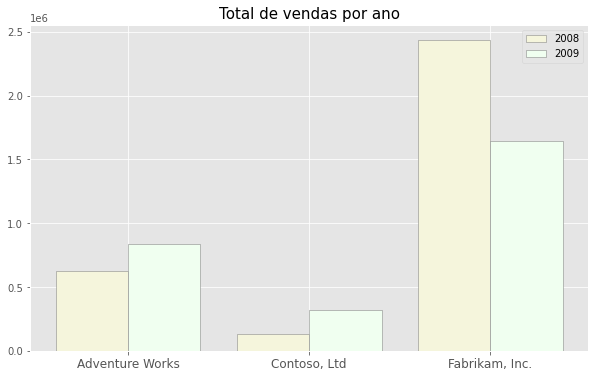

In [32]:
x = np.arange(len(venda_fabricante_ano['Fabricante'].unique()))
largura = 0.40
fig, ax = plt.subplots(figsize = (10,6));

ax.bar(x - largura/2, venda_fabricante_ano.query("`Data Venda` == 2008")['Valor Venda'],
       largura, label = '2008', color = 'beige', edgecolor = 'grey');

ax.bar(x + largura/2, venda_fabricante_ano.query("`Data Venda` == 2009")['Valor Venda'],
       largura, label = '2009', color = 'honeydew', edgecolor = 'grey');
ax.set_title("Total de vendas por ano", fontsize = 15);
ax.set_xticks(x);
ax.set_xticklabels(venda_fabricante_ano['Fabricante'].unique(), fontsize = 12);
ax.legend();

Text(0.5, 1.0, 'Relação entre desconto e unidades vendidas')

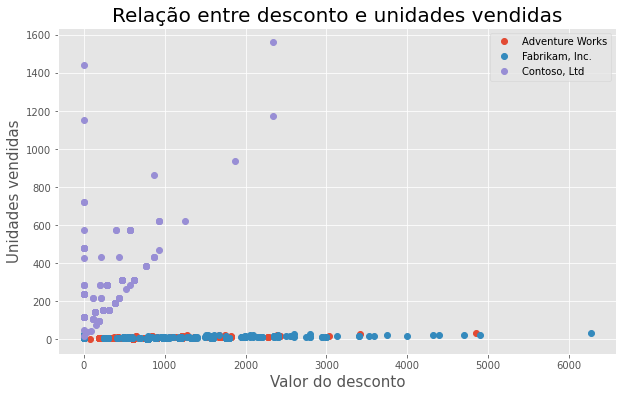

In [33]:
fig, ax = plt.subplots(figsize = (10, 6))
for fabricante in df['Fabricante'].unique():
    tmp_df = df.query('Fabricante == @fabricante')
    ax.plot(tmp_df['Valor Desconto'], tmp_df['Quantidade'], 'o', label = fabricante);

plt.legend();
plt.xlabel('Valor do desconto', fontsize = 15);
plt.ylabel('Unidades vendidas', fontsize = 15)
plt.title('Relação entre desconto e unidades vendidas', fontsize = 20)